In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('ds_salaries.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.shape

(3755, 11)

In [6]:
duplicates = df[df.duplicated(keep='last')]

# Drop the duplicate rows from the original dataframe
df_cleaned = df.drop_duplicates()

df_usa=df_cleaned[df_cleaned['company_location']=='US']

# Save the cleaned dataset to a new CSV file
df_usa.to_csv('cleaned_usa_data.csv', index=False)

In [7]:
df_usa.shape

(1929, 11)

In [8]:
df = pd.read_csv("cleaned_usa_data.csv")

In [9]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
1,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
3,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
4,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
1925,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1926,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1927,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [10]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

In [11]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [12]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
1,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,LARGE,Data Science
3,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,LARGE,Data Science
4,2023,Senior,Full-time,Data Scientist,147100,USD,147100,US,On-Site,US,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,Senior,Full-time,Data Specialist,165000,USD,165000,US,Full-Remote,US,LARGE,Other
1925,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
1926,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
1927,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science


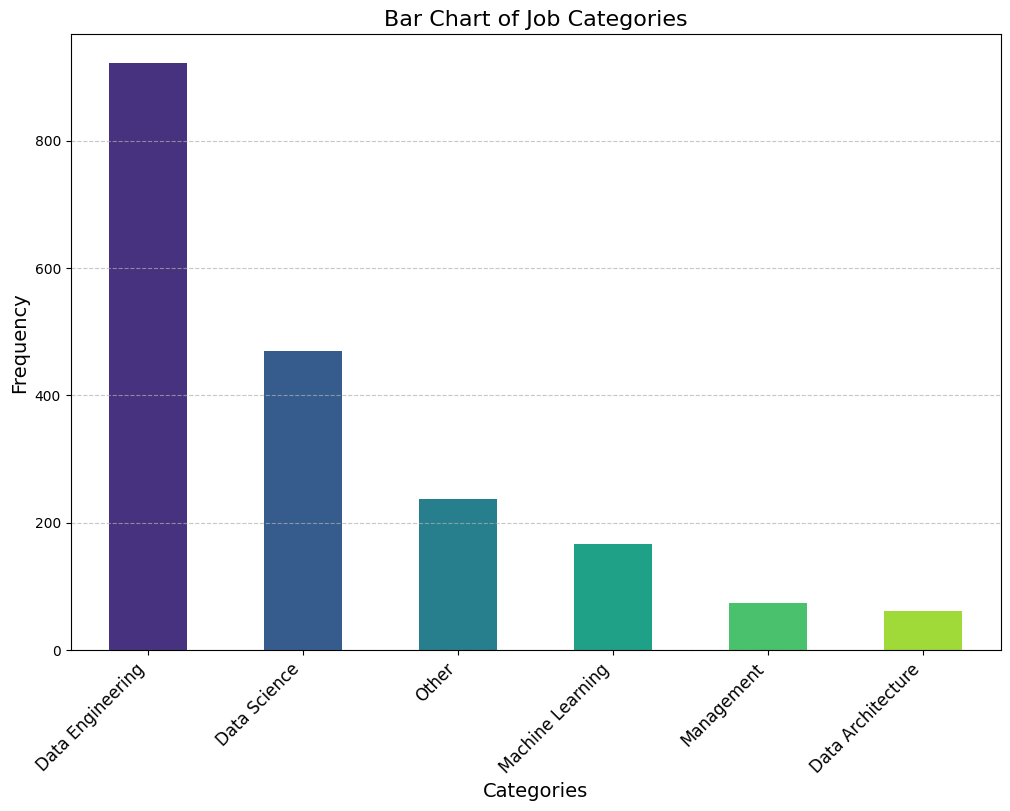

In [13]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart with a colorful palette
df['job_category'].value_counts().plot(kind='bar', color=sns.color_palette('viridis', len(df['job_category'].unique())))

# Add titles and labels
plt.title('Bar Chart of Job Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

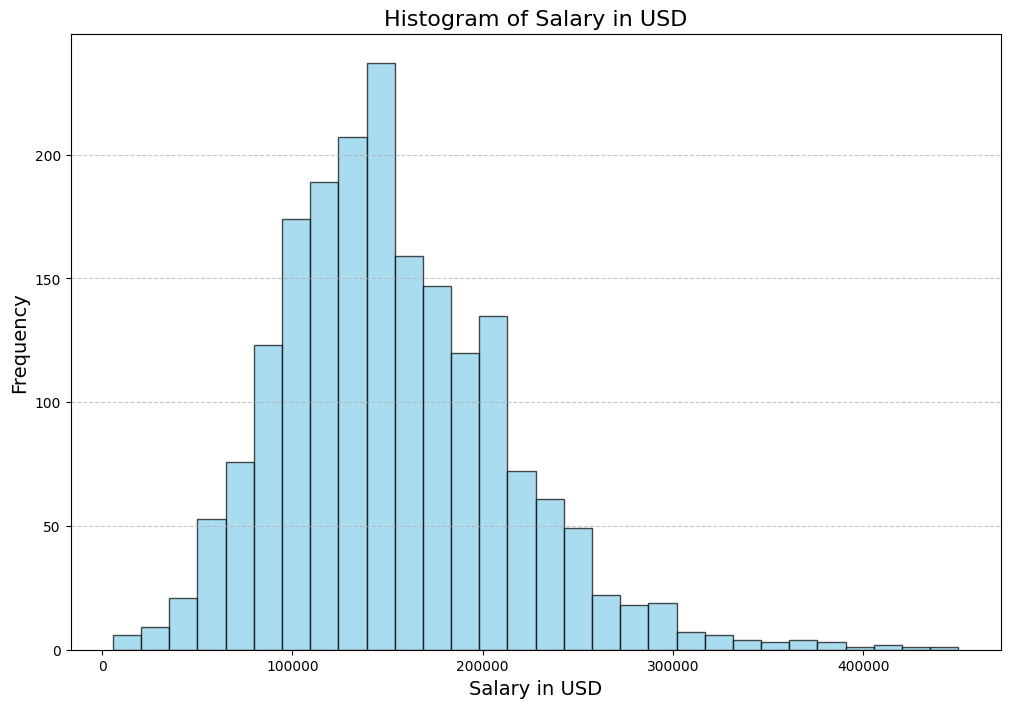

In [14]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the histogram with a colorful palette
df['salary_in_usd'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

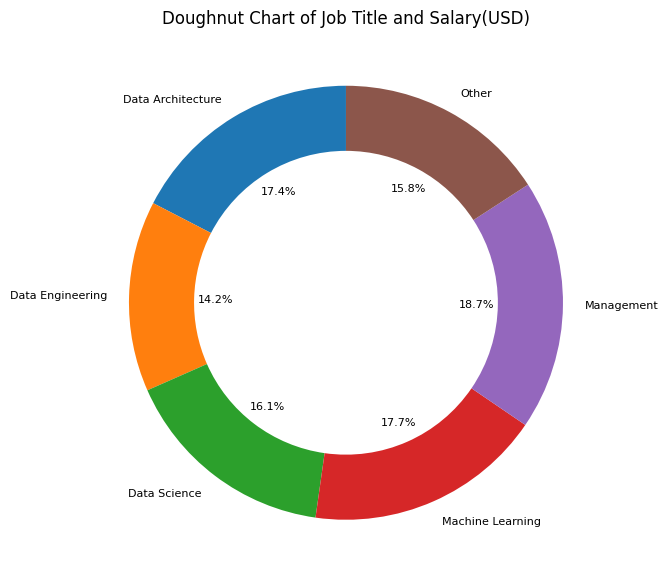

In [15]:
# Calculate the average of salary(USD) for each job title (10 counts or more)
job_title_salary = df.groupby('job_category')['salary_in_usd'].mean()

# Create the pie chart based on average salary(USD)
plt.figure(figsize=(7, 10))
plt.pie(job_title_salary, labels=job_title_salary.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 8})
plt.title('Doughnut Chart of Job Title and Salary(USD)')
plt.show()

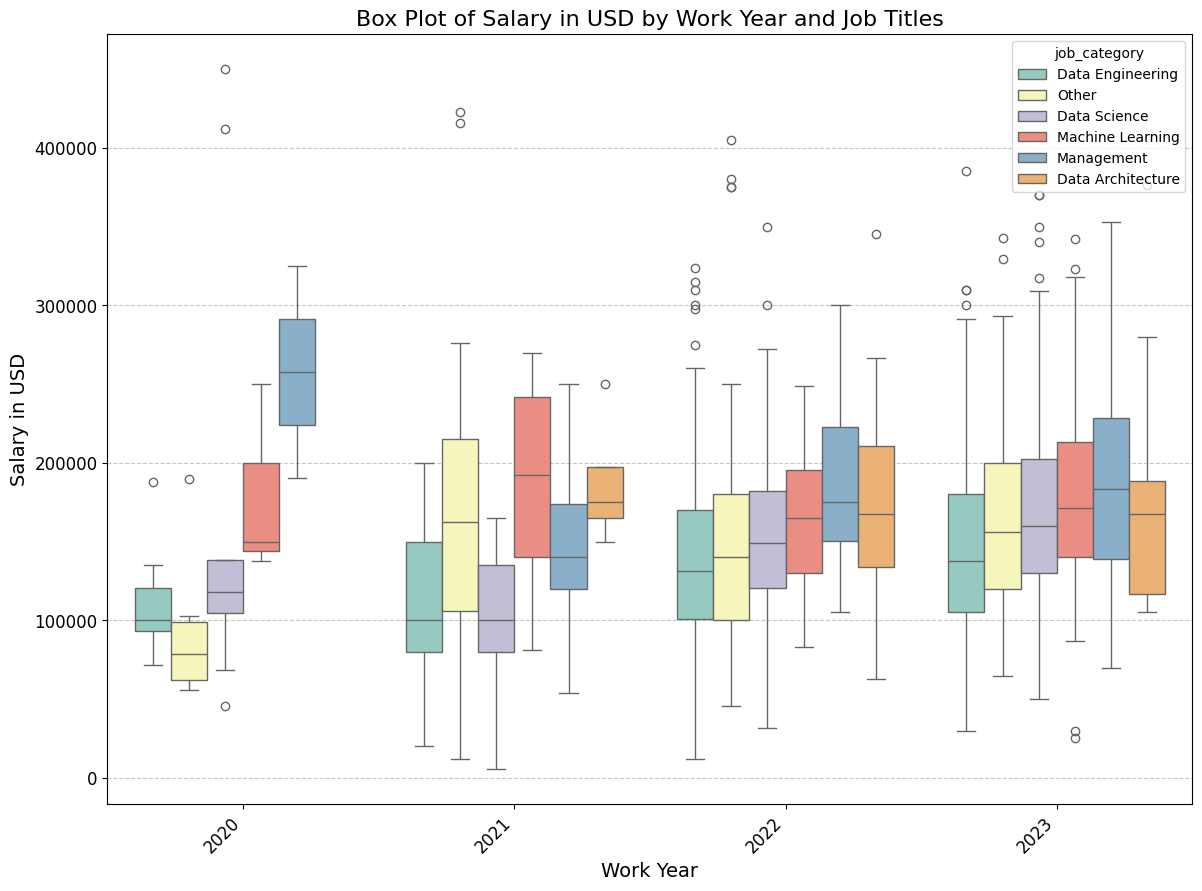

In [16]:
plt.figure(figsize=(14, 10))

# Create a box plot to visualize the relationship between work year, job titles, and salary
sns.boxplot(data=df, x='work_year', y='salary_in_usd', hue='job_category', palette='Set3')

# Add titles and labels
plt.title('Box Plot of Salary in USD by Work Year and Job Titles', fontsize=16)
plt.xlabel('Work Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

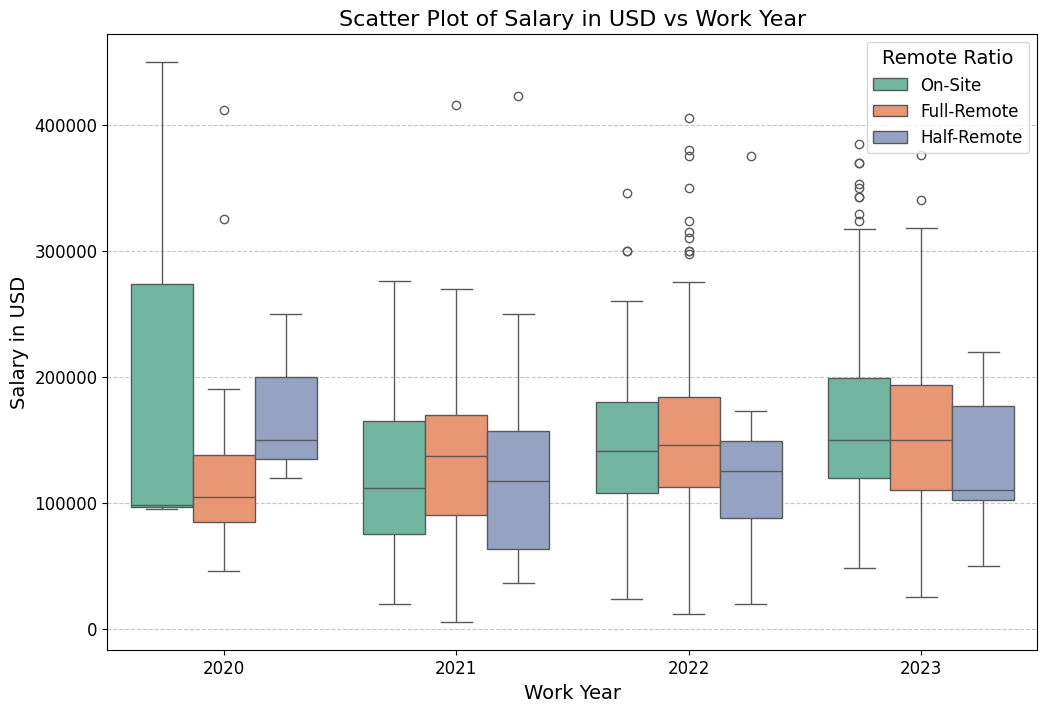

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette='Set2', hue='remote_ratio')
plt.title('Scatter Plot of Salary in USD vs Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Remote Ratio', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

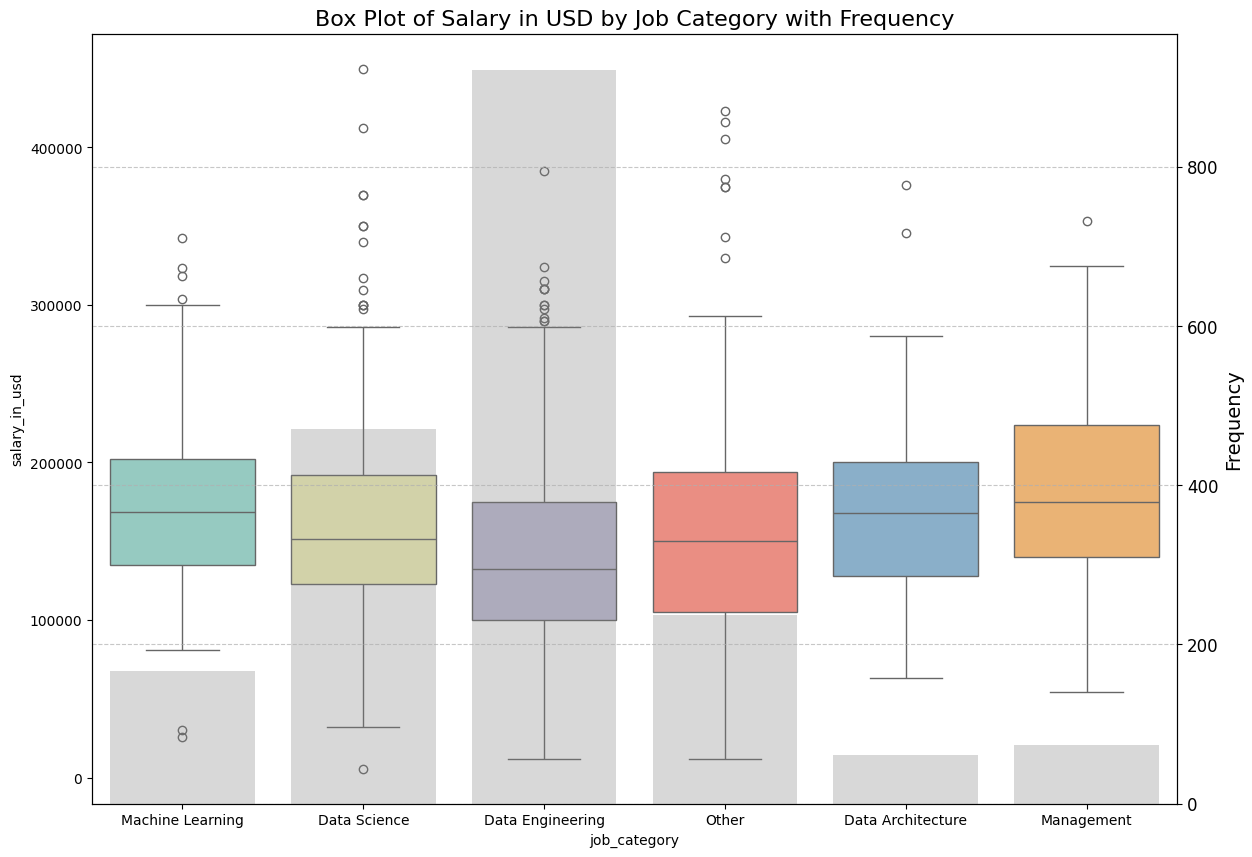

In [18]:
plt.figure(figsize=(14, 10))

# Create a box plot
sns.boxplot(data=df, x='job_category', y='salary_in_usd', palette='Set3' , hue='job_category' , legend=False)

# Create a secondary y-axis for the frequency
ax2 = plt.twinx()

# Create a count plot on the secondary y-axis
sns.countplot(data=df, x='job_category', alpha=0.3, ax=ax2, color='gray')

# Add titles and labels
plt.title('Box Plot of Salary in USD by Job Category with Frequency', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


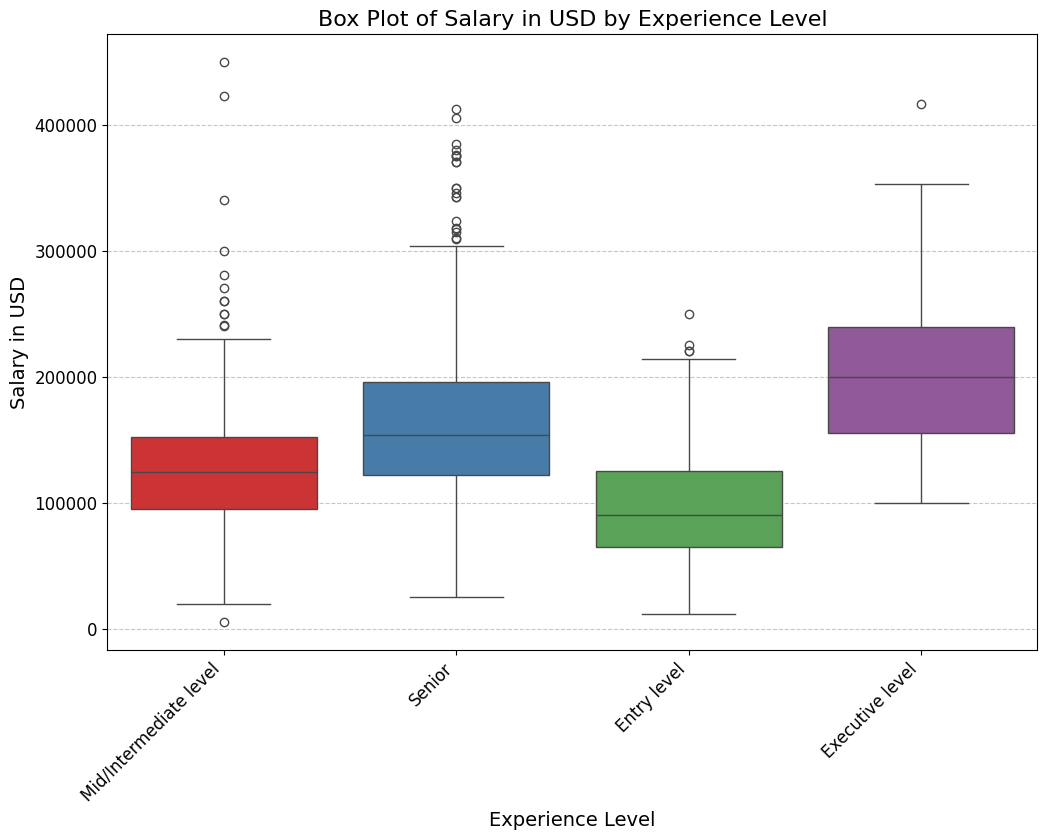

In [19]:
plt.figure(figsize=(12, 8))

# Create a box plot to visualize the relationship between experience level and salary
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set1', hue='experience_level', legend=False)

# Add titles and labels
plt.title('Box Plot of Salary in USD by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

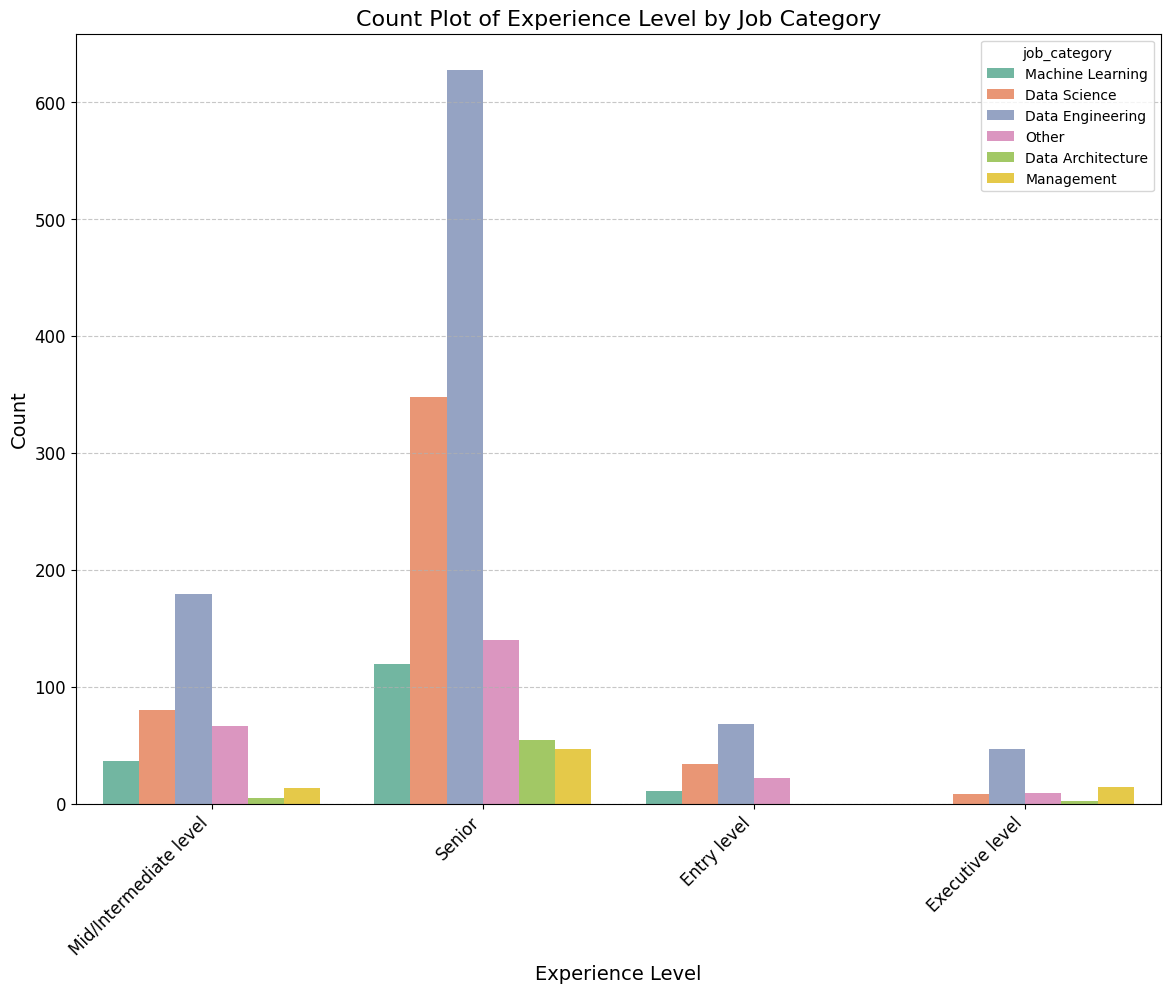

In [20]:
plt.figure(figsize=(14, 10))

# Create a count plot to visualize the relationship between experience level and job category
sns.countplot(data=df, x='experience_level', hue='job_category', palette='Set2')

# Add titles and labels
plt.title('Count Plot of Experience Level by Job Category', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


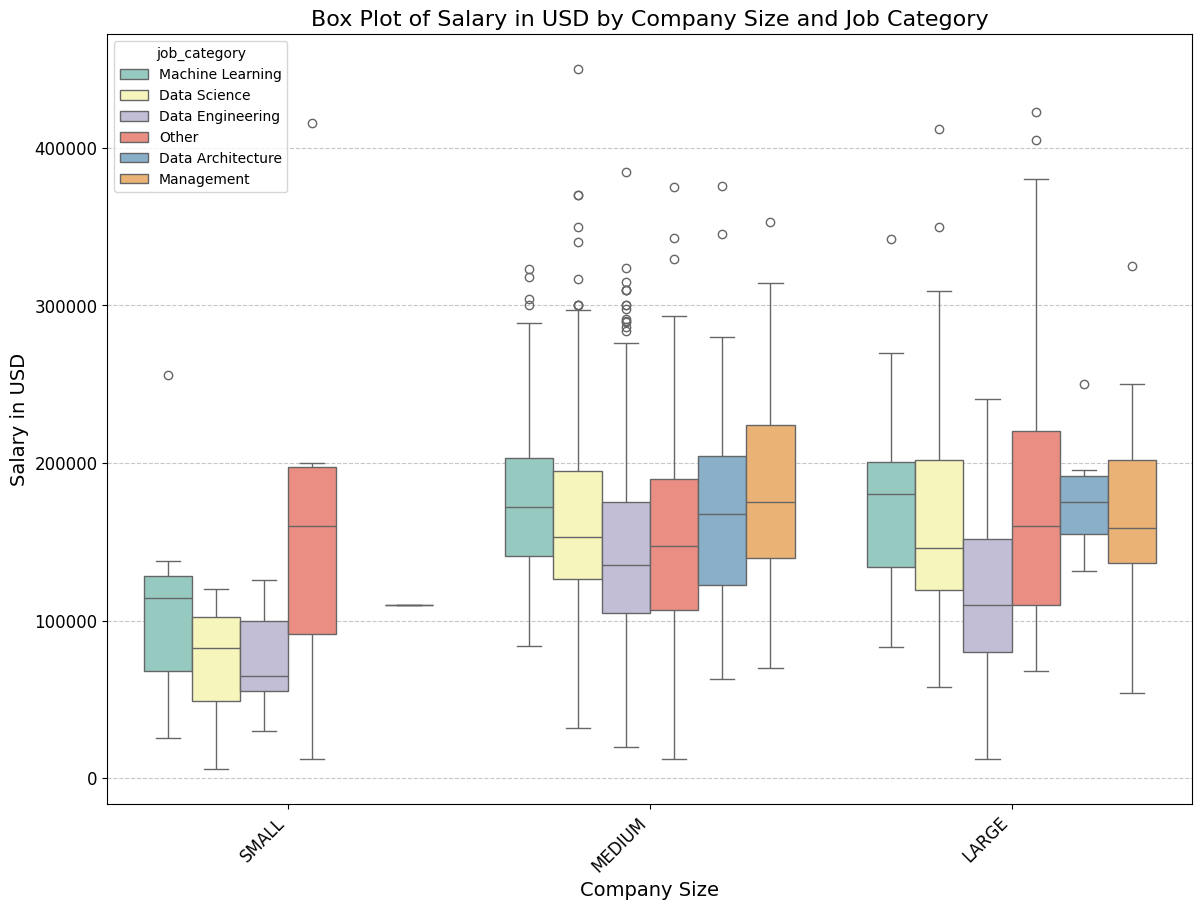

In [21]:
plt.figure(figsize=(14, 10))

# Create a box plot to visualize the relationship between company size, job category, and salary
sns.boxplot(data=df, x='company_size', y='salary_in_usd', hue='job_category', palette='Set3', order=['SMALL', 'MEDIUM', 'LARGE'])

# Add titles and labels
plt.title('Box Plot of Salary in USD by Company Size and Job Category', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

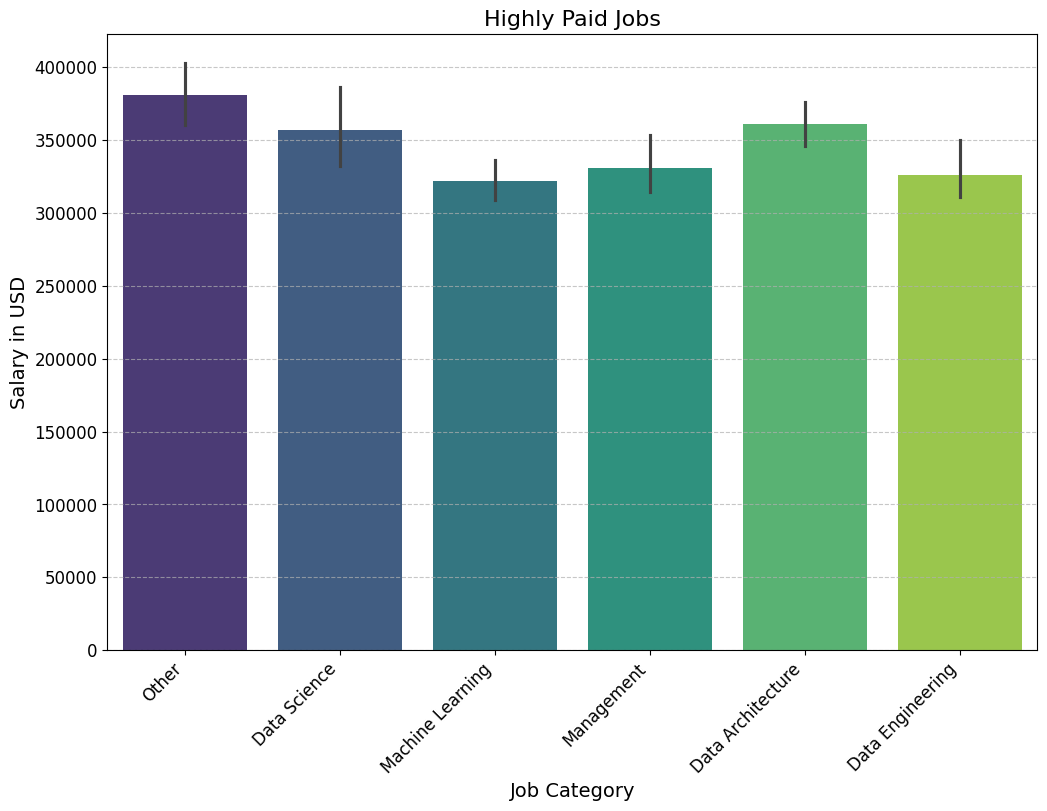

In [22]:
highly_paid_jobs = df[df['salary_in_usd'] > 300000]

plt.figure(figsize=(12, 8))
# Create a bar plot for highly paid jobs
sns.barplot(data=highly_paid_jobs, x='job_category', y='salary_in_usd', palette='viridis' , hue='job_category' , legend=False)

# Add titles and labels
plt.title('Highly Paid Jobs', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


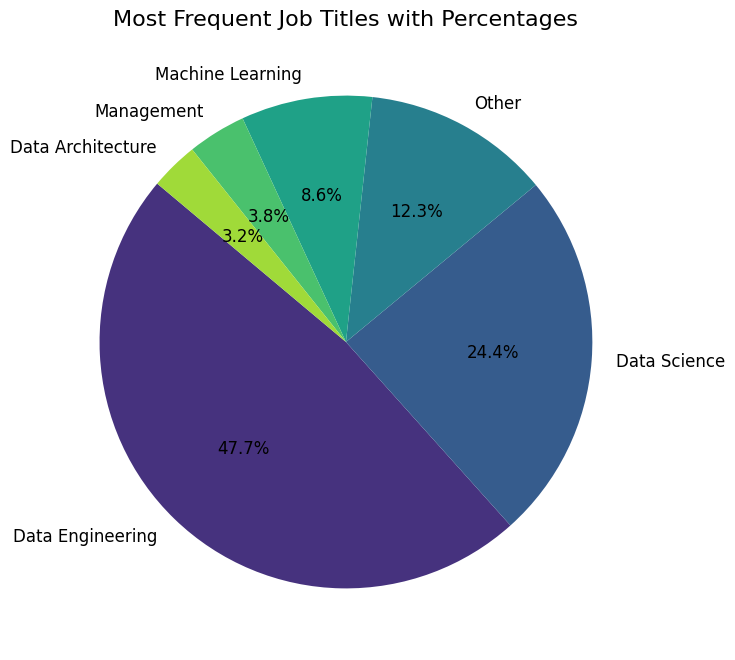

In [23]:
# Get the most frequent job titles
most_frequent_job_titles = df['job_category'].value_counts().head(10)
# most_frequent_job_titles = df['job_title'].value_counts().head(10) we can do for both


# Calculate the percentage of each job title
most_frequent_job_titles_percentage = most_frequent_job_titles / most_frequent_job_titles.sum() * 100

# Plot the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    most_frequent_job_titles_percentage, 
    labels=most_frequent_job_titles.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(most_frequent_job_titles))
)

# Add a title
plt.title('Most Frequent Job Titles with Percentages', fontsize=16)

# Adjust the text size
for text in texts + autotexts:
    text.set_fontsize(12)

# Show the plot
plt.show()



In [24]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
1,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,LARGE,Data Science
3,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,LARGE,Data Science
4,2023,Senior,Full-time,Data Scientist,147100,USD,147100,US,On-Site,US,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,Senior,Full-time,Data Specialist,165000,USD,165000,US,Full-Remote,US,LARGE,Other
1925,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
1926,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
1927,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science


In [25]:
df['experience_level'] = df['experience_level'].replace({
    'Senior': 3,
    'Entry level': 1,
    'Executive level': 4,
    'Mid/Intermediate level': 2,
})

df['employment_type'] = df['employment_type'].replace({
    'Freelancer': 1,
    'Contractor': 2,
    'Full-time': 3,
    'Part-time': 4
})

df['company_size'] = df['company_size'].replace({
    'SMALL': 1,
    'MEDIUM': 2,
    'LARGE': 3,
})

df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    'On-Site': 0,
    'Half-Remote': 50,
    'Full-Remote': 100,
})
df['job_category'] = df['job_category'].replace({
    'Data Engineering': 1,
    'Data Science': 2,
    'Machine Learning': 3,
    'Data Architecture': 4,
    'Management': 5,
    'Other': 6
})

C:\Users\pskra\AppData\Local\Temp\ipykernel_17792\610050977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({
C:\Users\pskra\AppData\Local\Temp\ipykernel_17792\610050977.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['employment_type'] = df['employment_type'].replace({
C:\Users\pskra\AppData\Local\Temp\ipykernel_17792\610050977.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

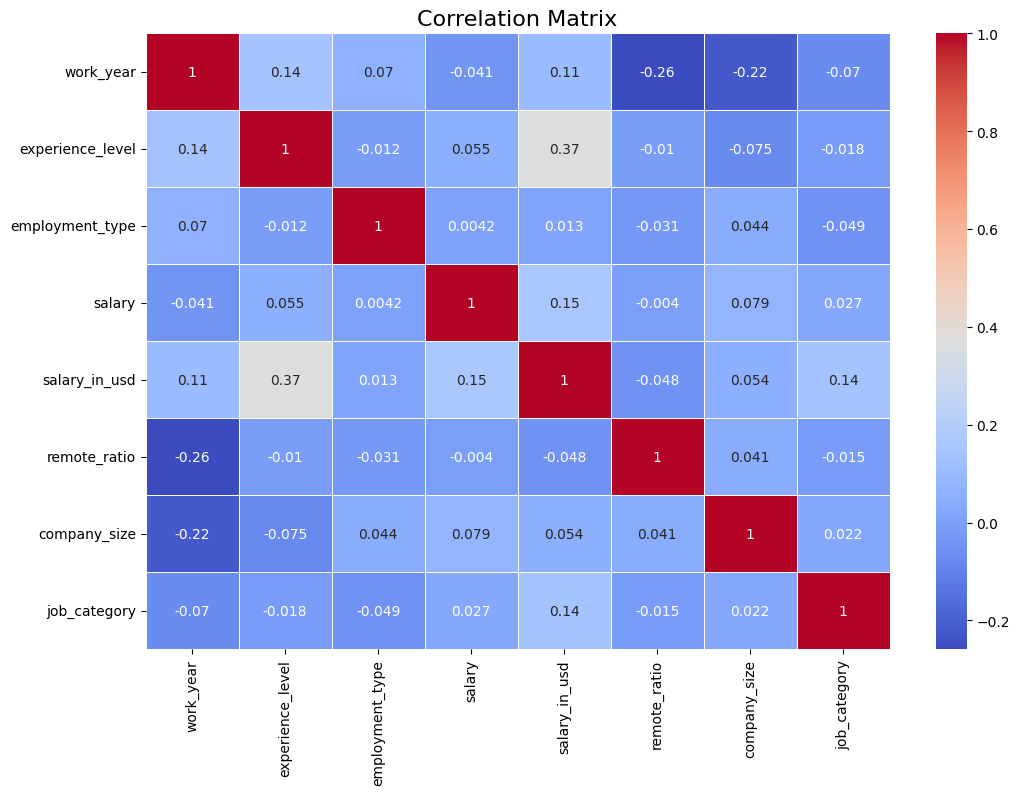

In [26]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [27]:
small_company_count = df[df['company_size'] == 1].shape[0]
print(f"Number of small companies: {small_company_count}")

Number of small companies: 53
